```sh
dvc exp run --queue \
    -S dataset.path='bdsaglam/musique' \
    -S qa.model='llama-3-70b-tgi' \
    -S qa.temperature='0.1,0.5,0.7,1.0' \
    -S qa.prompt='standard,cot-zs,cot-fs,cte' \
    -S run='1,2,3'
```

In [1]:
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from bellem.dvc.experiment import load_experiments

experiments = load_experiments('prompt-comparison-full.json')
print(f"{len(experiments)} experiments")

59 experiments


In [3]:
df = pd.json_normalize(experiments).drop(columns=["commit", "id", "name"])

param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop_duplicates(subset=param_cols, inplace=True)

df = df.sort_values(["params.qa.model", "params.qa.prompt", "params.qa.temperature", "params.run"]).reset_index(drop=True)
df.head()

,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.prompt,params.qa.model,params.qa.temperature,params.run,metrics.exact_match,metrics.f1,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match,metrics.3hops.exact_match,metrics.3hops.f1,metrics.3hops.fuzzy_match,metrics.4hops.exact_match,metrics.4hops.f1,metrics.4hops.fuzzy_match
0,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.1,1,0.371949,0.440146,0.416632,0.492812,0.579031,0.544728,0.265789,0.317219,0.310526,0.197531,0.241481,0.219753
1,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.1,2,0.371121,0.438157,0.414977,0.489617,0.573758,0.538339,0.253947,0.308221,0.301316,0.224691,0.262796,0.246914
2,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.1,3,0.364915,0.433579,0.407530,0.488019,0.571273,0.534345,0.253947,0.308938,0.301316,0.192593,0.241809,0.214815
3,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.5,1,0.362019,0.429637,0.408357,0.484026,0.569564,0.536741,0.253947,0.309194,0.303947,0.187654,0.223092,0.207407
4,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.5,2,0.377327,0.440525,0.422838,0.508786,0.587742,0.562300,0.248684,0.297966,0.293421,0.212346,0.252939,0.234568


In [4]:
run_counts = df.groupby(["params.qa.prompt", "params.qa.temperature"])[metric_cols[:1]].count().reset_index()
mask = run_counts[metric_cols[0]] < 3
run_counts.loc[mask]

,params.qa.prompt,params.qa.temperature,metrics.exact_match


In [5]:
df_avg = df.groupby(["params.qa.prompt", "params.qa.temperature"])[metric_cols].mean().reset_index()
df_avg

,params.qa.prompt,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match,metrics.3hops.exact_match,metrics.3hops.f1,metrics.3hops.fuzzy_match,metrics.4hops.exact_match,metrics.4hops.f1,metrics.4hops.fuzzy_match
0,cot-fs,0.1,0.369328,0.437294,0.413046,0.490149,0.574687,0.539137,0.257895,0.311459,0.304386,0.204938,0.248696,0.227160
1,cot-fs,0.5,0.370570,0.436562,0.415529,0.492545,0.576632,0.544995,0.259211,0.310496,0.303509,0.202469,0.240125,0.225514
2,cot-fs,0.7,0.371673,0.441629,0.416908,0.497604,0.581643,0.548456,0.257456,0.316870,0.302632,0.196708,0.242909,0.224691
3,cot-fs,1.0,0.362157,0.430948,0.405599,0.486954,0.570277,0.537274,0.253947,0.312560,0.296053,0.179424,0.222392,0.204115
4,cot-zs,0.1,0.361743,0.435725,0.405737,0.507188,0.597678,0.559372,0.246491,0.307621,0.292544,0.128395,0.175460,0.143210
5,cot-zs,0.5,0.362433,0.435526,0.405323,0.503195,0.591819,0.552449,0.244298,0.306593,0.287719,0.148971,0.194317,0.171193
6,cot-zs,0.7,0.354020,0.428812,0.397325,0.494941,0.584344,0.544196,0.236404,0.303405,0.285088,0.139095,0.183337,0.153909
7,cot-zs,1.0,0.344228,0.415912,0.386016,0.489350,0.573118,0.534345,0.223246,0.291174,0.273684,0.122634,0.164009,0.138272
8,cte,0.1,0.635912,0.741665,0.692456,0.653355,0.757428,0.714590,0.658333,0.772746,0.708333,0.539918,0.634610,0.594239
9,cte,0.5,0.631499,0.738394,0.689008,0.656550,0.758588,0.716986,0.643421,0.764371,0.698246,0.531687,0.627221,0.585185


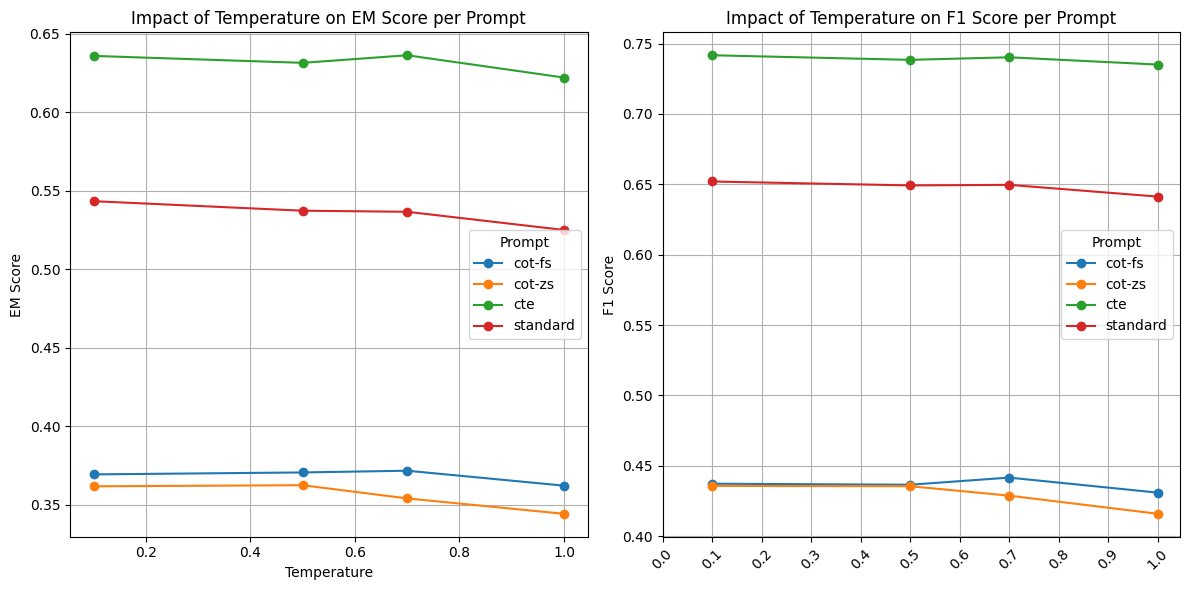

In [7]:
# Average metrics over repeated runs (params.run)
df_avg = df.groupby(["params.qa.prompt", "params.qa.temperature"])[metric_cols].mean().reset_index()

# Plotting the impact of temperature per prompt for both F1 and EM scores
prompts = df_avg["params.qa.prompt"].unique()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for prompt in prompts:
    subset = df_avg[df_avg["params.qa.prompt"] == prompt]
    
    # Plot EM scores
    axs[0].plot(subset["params.qa.temperature"], subset["metrics.exact_match"], marker="o", label=prompt)
    
    # Plot F1 scores
    axs[1].plot(subset["params.qa.temperature"], subset["metrics.f1"], marker="o", label=prompt)
    

# Set labels and titles for F1 subplot
axs[0].set_xlabel("Temperature")
axs[0].set_ylabel("EM Score")
axs[0].set_title("Impact of Temperature on EM Score per Prompt")
axs[0].legend(title="Prompt", loc='best')
axs[0].grid(True)

# Set labels and titles for EM subplot
axs[1].set_ylabel("F1 Score")
axs[1].set_title("Impact of Temperature on F1 Score per Prompt")
axs[1].legend(title="Prompt", loc='best')
axs[1].grid(True)

# Set x-ticks for temperature values
plt.xticks(ticks=list(np.arange(0, 1.1, 0.1)), rotation=45)

plt.tight_layout()
plt.show()

In [8]:
# To compare the prompts at the best temperature
# Assuming "best temperature" is defined as the one with the highest average F1 score
df_best_temp = (
    df_avg.loc[df_avg.groupby("params.qa.prompt")["metrics.f1"].idxmax()]
    .set_index("params.qa.prompt", drop=False)
    .loc[["standard", "cot-zs", "cot-fs", "cte"]]
    .copy()
)
df_best_temp

,params.qa.prompt,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match,metrics.3hops.exact_match,metrics.3hops.f1,metrics.3hops.fuzzy_match,metrics.4hops.exact_match,metrics.4hops.f1,metrics.4hops.fuzzy_match
params.qa.prompt,,,,,,,,,,,,,,
standard,standard,0.1,0.543373,0.651989,0.607916,0.584398,0.690354,0.646699,0.530702,0.651637,0.613158,0.440329,0.534049,0.478189
cot-zs,cot-zs,0.1,0.361743,0.435725,0.405737,0.507188,0.597678,0.559372,0.246491,0.307621,0.292544,0.128395,0.175460,0.143210
cot-fs,cot-fs,0.7,0.371673,0.441629,0.416908,0.497604,0.581643,0.548456,0.257456,0.316870,0.302632,0.196708,0.242909,0.224691
cte,cte,0.1,0.635912,0.741665,0.692456,0.653355,0.757428,0.714590,0.658333,0.772746,0.708333,0.539918,0.634610,0.594239


In [9]:
best_temperatures = df.loc[df.groupby('params.qa.prompt')['metrics.f1'].idxmax()]
best_temperatures

,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.prompt,params.qa.model,params.qa.temperature,params.run,metrics.exact_match,metrics.f1,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match,metrics.3hops.exact_match,metrics.3hops.f1,metrics.3hops.fuzzy_match,metrics.4hops.exact_match,metrics.4hops.f1,metrics.4hops.fuzzy_match
7,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.7,2,0.377327,0.443775,0.419942,0.509585,0.589117,0.557508,0.257895,0.308823,0.296053,0.192593,0.247714,0.227160
17,bdsaglam/musique,answerable,validation,cot-zs,llama-3-70b-tgi,0.5,3,0.368225,0.442912,0.407944,0.503994,0.594645,0.551917,0.257895,0.318333,0.289474,0.155556,0.207625,0.185185
24,bdsaglam/musique,answerable,validation,cte,llama-3-70b-tgi,0.1,1,0.638395,0.743800,0.694249,0.655751,0.758148,0.718051,0.661842,0.777491,0.709211,0.540741,0.636223,0.592593
43,bdsaglam/musique,answerable,validation,standard,llama-3-70b-tgi,0.7,2,0.539098,0.652853,0.603641,0.581470,0.691111,0.643770,0.527632,0.653156,0.609211,0.429630,0.534014,0.469136


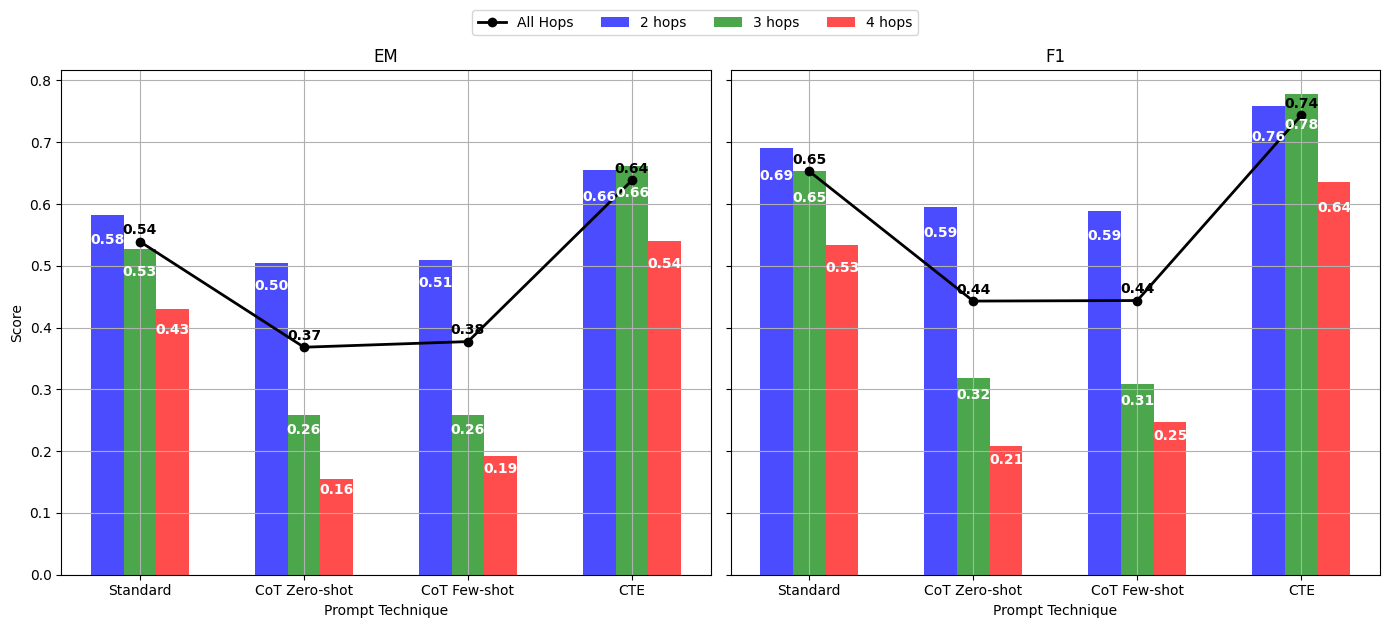

In [10]:
def plot_metric(ax, x, width, prompts, metrics, title, ylabel=None):
    bars_2hops = ax.bar(x - width, metrics["2hops"], width, label="2 hops", color="b", alpha=0.7)
    bars_3hops = ax.bar(x, metrics["3hops"], width, label="3 hops", color="g", alpha=0.7)
    bars_4hops = ax.bar(x + width, metrics["4hops"], width, label="4 hops", color="r", alpha=0.7)

    # Plotting all hops as a line plot
    ax.plot(x, metrics["all"], label="All Hops", color="k", linestyle="-", marker="o", linewidth=2)

    # Adding values inside the bars, just below the top
    for bars in [bars_2hops, bars_3hops, bars_4hops]:
        for bar in bars:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() - (bar.get_height() * 0.05),
                f"{bar.get_height():.2f}",
                ha="center",
                va="top",
                fontsize=10,
                color="white",
                fontweight="bold",
            )

    # Adding values on top of the line plot
    for i, value in enumerate(metrics["all"]):
        ax.text(
            x[i],
            value+0.007,
            f"{value:.2f}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )

    # Adjust titles and labels
    ax.set_title(title)
    ax.set_xlabel("Prompt Technique")
    ax.set_xticks(x)
    ax.set_xticklabels(
        [
            "Standard"
            if prompt == "standard"
            else "CoT Zero-shot"
            if prompt == "cot-zs"
            else "CoT Few-shot"
            if prompt == "cot-fs"
            else "CTE"
            if prompt == "cte"
            else prompt.capitalize()
            for prompt in prompts
        ]
    )
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.grid(True)


# Creating subplots for Exact Match and F1, separating them for clarity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

width = 0.2  # Bar width adjustment

# Changing the order of prompts to standard, cot-zs, cot-fs, cte
order = ["standard", "cot-zs", "cot-fs", "cte"]
best_temperatures = best_temperatures.set_index("params.qa.prompt").loc[order].reset_index()
prompts = best_temperatures["params.qa.prompt"].values
x = np.arange(len(prompts))

# Plotting Exact Match
metrics_em = {
    "2hops": best_temperatures["metrics.2hops.exact_match"].values,
    "3hops": best_temperatures["metrics.3hops.exact_match"].values,
    "4hops": best_temperatures["metrics.4hops.exact_match"].values,
    "all": best_temperatures["metrics.exact_match"].values,
}
plot_metric(ax1, x, width, prompts, metrics_em, title="EM", ylabel="Score")

# Plotting F1
metrics_f1 = {
    "2hops": best_temperatures["metrics.2hops.f1"].values,
    "3hops": best_temperatures["metrics.3hops.f1"].values,
    "4hops": best_temperatures["metrics.4hops.f1"].values,
    "all": best_temperatures["metrics.f1"].values,
}
plot_metric(ax2, x, width, prompts, metrics_f1, title="F1")

# Creating a shared legend outside the plots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=4)

plt.tight_layout()
plt.show()